# What is Survival Analysis?

[Survival analysis](https://en.wikipedia.org/wiki/Survival_analysis) is used to study the **time** until some **event** of interest (often referred to as **death**) occurs.  Time could be measured in years, months, weeks, days, etc.  The event could be anything of interest.  It could be an actual death, a birth, a customer or employee churn, etc. In this case we are interested in how long a patient with lung disease will survive, so the event of interest will be the death. The duration of time leading up to the event of interest can be called the **survival time**. 

Some of the patients in this analysis are still alive, so we haven't observed their event of interest.  Those patients are considered **censored**. This specific type of censorship, one in which we do not observe end of the survival time, is called **right-censorship**.  The methods developed in the field of survival analysis were created in order to deal with the issue of censored data.  We are goint to use the [Kaplan-Meier estimator](https://en.wikipedia.org/wiki/Kaplan%E2%80%93Meier_estimator), to estimate the survival function and construct the survival curve for patients.


# What is the Survival Function?

The [survival function](https://en.wikipedia.org/wiki/Survival_function), $S(t)$, of a population is defined as follows:

$$S(t) = Pr(T > t)$$

Capital $T$ is a [random variable](https://www.khanacademy.org/math/probability/random-variables-topic/random-variables-prob-dist/v/random-variables) that represents a subject's survival time. In our case $T$ represents a patient's life length. Lower case $t$ represents a specific time of interest for $T$. In our analysis the $t$ represents a specific number of days being alive. In other words the survival function just gives us the probability that someone survives longer than (or at least as long as) a specified value of time, $t$.  So in the context of our analysis, $S(11)$ will provide us the probability that a patient life lasts longer than 11 days.

# What is the Kaplan-Meier estimator?

To estimate the survival function we will use the Kaplan-Meier estimator.  The Kaplan-Meier estimator is defined by the following product:

$$\hat{S}(t) = \prod_{t_i \lt t} \frac{n_i - d_i}{n_i}$$

where $d_i$ are the number of death events at time $t$ and $n_i$ is the number of subjects at risk of death just prior to time $t$. 

Kaplan-Meier is a non-parametric statistic that estimates the survival function of time-to-event data. Non-parametric because constructs a survival curve from collected data and does not assume underlying distribution

To estimate the survival function we will be using the [`lifelines` library](https://lifelines.readthedocs.io/en/latest/index.html).  It provides a user friendly interface for survival analyis using Python. Lets get started by importing what we need and reading in the data.

In [ ]:
# Import required libraries :
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# !pip install lifelines
from lifelines import KaplanMeierFitter

In [ ]:
filename = os.path.join("data", "lung.csv")
data = pd.read_csv(filename)
data

#### Feature describtion<br>
inst:	Institution code<br>
time:	Survival time in days<br>
status:	censoring status 1=censored, 2=dead<br>
age:	Age in years<br>
sex:	Male=1 Female=2<br>
ph.ecog:ECOG performance score as rated by the physician. 0=asymptomatic, 1= symptomatic but completely ambulatory, 2= in               bed <50% of the day, 3= in bed > 50% of the day but not bedbound, 4 = bedbound
ph.karno:	Karnofsky performance score (bad=0-good=100) rated by physician<br>
pat.karno:	Karnofsky performance score as rated by patient<br>
meal.cal:	Calories consumed at meals<br>
wt.loss:	Weight loss in last six months (pounds)<br>

In [ ]:
# Additional info about our dataset :
data.info()

In [ ]:
# Statistical info about our dataset :
data.describe()

In [ ]:
sex_counts = data['sex'].value_counts()

# Plotting the count of categories in 'sex'
colors = ['blue', 'pink']  
ax = sex_counts.plot(kind='bar', color=colors)

plt.title('Count of Categories in Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Ensure the x-axis labels are horizontal

# Adding count values on top of the bars
for i, count in enumerate(sex_counts):
    ax.text(i, count + 0.5, str(count), ha='center')

plt.show()

Out of 228 observations 138 are males and 90 are females

In [ ]:
# Filter the DataFrame where status is 2
filtered_df = data[data['status'] == 2]

# Count the categories in the 'sex' column
sex_counts_df = filtered_df['sex'].value_counts()

# Plot the count of categories in 'sex' column when status=2
sex_counts.plot(kind='bar', color=['blue', 'pink'])  
ax = sex_counts_df.plot(kind='bar', color=colors)
plt.title('Count of Deaths for males and females')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Ensure the x-axis labels are horizontal

# Adding count values on top of the bars
for i, count in enumerate(sex_counts_df):
    ax.text(i, count + 0.5, str(count), ha='center')

plt.show()




Overall, there are 165 cases of death, with 112 males and 53 females

In [ ]:
# Group the data by 'sex' and calculate the mean age for each category
avg_age_sex = filtered_df.groupby('sex')['age'].mean()

# Plotting the average age for sex categories
avg_age_sex.plot(kind='bar', color=['blue', 'pink'])  
ax = avg_age_sex.plot(kind='bar', color=colors)
plt.title('Average Age for males anf females of event occured')
plt.xlabel('Sex')
plt.ylabel('Average Age')
plt.xticks(rotation=0)  # Ensure the x-axis labels are horizontal

# Adding count values on top of the bars
for i, count in enumerate(avg_age_sex):
    ax.text(i, count + 0.5, '{:.2f}'.format(count), ha='center')


plt.show()

The mean age of the observed instances where the event occurred is quite consistent. On average, female patients have a life expectancy around 1.73 years lower in comparison to males.

In [ ]:
# Before fitting Kaplan-Meier Estimator, create a new column based on "status", where
# if the status value is 1 we have censored data
# if the status value is 2 we have the event occured (death)

data.loc[data.status == 1, 'dead'] = 0
data.loc[data.status == 2, 'dead'] = 1

data.head()

In [ ]:
# Create the K-M Fitter
kmf = KaplanMeierFitter() 

In [ ]:
# The 1st argument takes an array or pd.Series of individual survival times
# The 2nd argument takes an array or pd.Series that indicates if the event (death)

kmf.fit(durations = data["time"], event_observed = data["dead"])

In [ ]:
print(data.time.min())
print(data.time.max())

##### So the line above presents that out of 228 total observations we have 63 RIGHT CENSORED data

In [ ]:
x = kmf.event_table

In [ ]:
for _, row in x.iterrows():
    print(row['at_risk'], row['removed'], row['observed'])

In [ ]:
kmf.event_table

The *removed* column contains the number of observations removed during that time period, whether due to death (the value in the *observed* column) or censorship. So the *removed* column is just the sum of the *observed* and *censorship* columns.  The *entrance* column tells us whether any new subjects entered the population at that time period.  Since all the patients we are studying start at $time = 0$ , the *entrance* value is 228 at that time and 0 for all other times.

The *at_risk* column contains the number of subjects that are still alive during a given time. The value for *at_risk* at $time = 0$, is just equal to the *entrance* value.  For the remaining time periods, the *at_risk* value is equal to the difference between the time previous period's *at_risk* value and *removed* value, plus the current period's *entrance* value. For example for $time = 11$, the number of subject's *at risk*  is 227 which is equal to 228 (the previous *at_risk* value) - 1 (the previous *removed* value) + 0 (the current period's *entrance* value).

Since we have access to the survival table we can calculate the survival probability at different times "by hand."

Let us take a look at the definition of the Kaplan-Meier Estimate again:

$$\hat{S}(t) = \prod_{t_i \lt t} \frac{n_i - d_i}{n_i}$$

where  $d_i$  are the number of death events at time  $t$  and  $n_i$  is the number of subjects at risk of death just prior to time  $t$. 

What the above essentially tells us is that the value of the survival function for time $t$, is the product of the survival probabilities for all individual time periods leading up to time $t$. 

We can define the survival probability for an individual time period as follows:

$$S_t = \frac{\substack{\text{Number of subjects} \\ \text{at risk at the start}} - \substack{\text{Number of subjects} \\ \text{that died}}}{\substack{\text{Number of subjects} \\ \text{at risk at the start}}}$$

**NOTE** the number of deaths in the above formula does not include the number of censored observations.  

<u>Get information about the time 0

In [ ]:
event_at_0 = kmf.event_table.iloc[0,:]
event_at_0

<u> Get the survival probability at time 0

In [ ]:
#calculate the survival probability for t=0
surv_for_0 = (event_at_0.at_risk - event_at_0.observed)/event_at_0.at_risk
surv_for_0

<u>Get information about the time 5

In [ ]:
event_at_5 = kmf.event_table.iloc[1,:]
event_at_5

<u>Get the survival probability at time 5

In [ ]:
surv_for_5 = (event_at_5.at_risk - event_at_5.observed)/event_at_5.at_risk
surv_for_5


<u>Get information about the time 11

In [ ]:
event_at_11 = kmf.event_table.iloc[2,:]
event_at_11

In [ ]:
surv_for_11 = (event_at_11.at_risk - event_at_11.observed)/event_at_11.at_risk
surv_for_11


$surv11 $ also represents a conditional probability.  It is the probability that a patient lives 11 days given that he did not dead after 5 days.  This ends up being about 98.6%.

Finally we can calculate the probability that a patient's life will last more than 11 days, we just multiply the three individual survival probabilities:

$$S(11) = surv_0 \times surv_5 \times surv_11 = \frac{228}{228} \times \frac{227}{228} \times \frac{224}{227}  \approx 0.982$$

In [ ]:
# The probability to survive after time 5 is:
surv_after_5 = surv_for_0 * surv_for_5
surv_after_5

In [ ]:
# The probability to survive after time 11 is:
surv_after_11 = surv_for_0 * surv_for_5 * surv_for_11
surv_after_11

#kmf.predict(11) # calculates the same

### Now we can use Kaplan-Meier Estimator to calculate/predict the probability of surviving after t time

Or we can use kfm survival_function_ to estimate survival probability for all time periods

In [ ]:
kmf.survival_function_

In [ ]:
# Probabaility of die at time t, calculate cumulative density, which is equal
# 1 - KM_estimate

kmf.cumulative_density_

#kmf.cumulative_density_.head()

In [ ]:
kmf.plot_cumulative_density()

In [ ]:
# Get confidence interval
kmf.confidence_interval_

### Plot the K-M Curve

In [ ]:
# Plot the graph :

kmf.plot()

plt.title("The Kaplan-Meier Estimate")
plt.ylabel("Probability of patient still alive")
plt.show()

We can also add censored data point on the K-M Curve

In [ ]:
# Extracting duration and event status
durations = data['time']
event_observed = data['dead']

# Fitting Kaplan-Meier
kmf = KaplanMeierFitter()
kmf.fit(durations, event_observed)


plt.figure(figsize=(12, 8)) 
ax = kmf.plot()

# Extracting censored data points for plotting
censored_data = data[data['dead'] == 0]  

# Predicting survival probabilities for censored data
survival_prob = kmf.predict(censored_data['time'])

# Adding censored data points on the Kaplan-Meier curve
for time, prob in zip(censored_data['time'], survival_prob):
    plt.scatter(time, prob, marker='x', color='red')

plt.title("Kaplan-Meier Survival Curve with Censored Data Points on Curve")
plt.xlabel("Time in days")
plt.ylabel("Survival probability")
plt.show()

In [ ]:
# Extracting duration and event status
durations = data['time']
event_observed = data['dead']

# Fitting Kaplan-Meier
kmf = KaplanMeierFitter()
kmf.fit(durations, event_observed)

# Plotting Kaplan-Meier estimate
ax = kmf.plot()

# Extracting censored data points for plotting
censored_data = data[data['dead'] == 0]  

# Predicting survival probabilities for censored data
survival_prob = kmf.predict(censored_data['time'])

# Adding censored data points on the Kaplan-Meier curve
for time, prob in zip(censored_data['time'], survival_prob):
    plt.scatter(time, prob, marker='x', color='red')

# Adding median survival time line
median_survival_time = kmf.median_survival_time_
plt.axvline(x=median_survival_time, color='green', linestyle='--', label=f"Median Survival Time: {median_survival_time:.2f} units")

plt.title("Kaplan-Meier Survival Curve with Censored Data Points and Median Survival Time")
plt.xlabel("Time")
plt.ylabel("Survival probability")
plt.legend()
plt.show()


The median survival time provides the number of days when on average 50% of patients died

In [ ]:
# Get the median survival days

kmf.median_survival_time_

#### To compare the Kaplan-Meier survival curves for male and female patients and assess the statistical significancedifference between the survival distributions, a common approach is to use the <u> log-rank test </u>(also known as the Mantel-Cox test). The log-rank test is based on the Kaplan-Meier curves and tests the null hypothesis that there's no difference in survival between groups.

<b> H0: Both groups have identical distribution curves.<br>
H1: Both groups have different distribution curves.

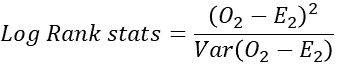

Where:

Ot​  is the observed number of events at each unique event time t (deaths or failures) in both groups.<br>
Et​  is the expected number of events at each unique event time t under the null hypothesis, which assumes the equality of survival distributions. The expected events are typically calculated based on the product of the total number of observed events and the proportion of individuals at risk in each group at time t.<br>
Vt​  is the variance at each unique event time t. It's calculated based on the number of individuals at risk in each group at that time.

<u> In lifelines.statistics import logrank_test the formula is above mentioned

In [ ]:
# Create data sets for males and females

Male = data.query("sex == 1")
Female = data.query("sex == 2")

In [ ]:
# Create the KM fitter for two datasets

kmf_m = KaplanMeierFitter() 
kmf_f = KaplanMeierFitter() 

In [ ]:
#Fit the datasets
# The 1st argument takes an array or pd.Series of individual survival times
# The 2nd argument takes an array or pd.Series that indicates if the event (death)

kmf_m.fit(durations =  Male["time"],event_observed = Male["dead"] ,label="Male")

kmf_f.fit(durations =  Female["time"],event_observed = Female["dead"], label="Female")

print(kmf_m)
print(kmf_f)

In [ ]:
# Get the event table for males
kmf_m.event_table

In [ ]:
# Get the event table for females
kmf_f.event_table

Based on the event tables provided, distinctions are evident between male and female patients. They exhibit variations in the timing of events, leading to diverse observations in the Kaplan-Meier estimations.<br>
Now we can etimate the survival probability for male and female patients

In [ ]:
print("For Males:")
print(kmf_m.survival_function_)

print("\nFor Females:")
print(kmf_f.survival_function_)

In [ ]:
# Plot the survival_function data :

kmf_m.plot()
kmf_f.plot()

plt.xlabel("Days passed")
plt.ylabel("Survival")
plt.title("KMF")

In [ ]:
# Extracting duration and event status
durations_m = Male['time']
event_observed_m = Male['dead']

# Fitting Kaplan-Meier
kmf_m= KaplanMeierFitter()
kmf_m.fit(durations_m, event_observed_m)


# Extracting duration and event status
durations_f = Female['time']
event_observed_f = Female['dead']

# Fitting Kaplan-Meier
kmf_f= KaplanMeierFitter()
kmf_f.fit(durations_f, event_observed_f)

In [ ]:
plt.figure(figsize=(12, 8)) 
ax = kmf_m.plot()

# Extracting censored data points for plotting
censored_data_m = Male[Male['dead'] == 0]  

# Predicting survival probabilities for censored data
survival_prob_m = kmf_m.predict(censored_data_m['time'])

# Adding censored data points on the Kaplan-Meier curve
for time, prob in zip(censored_data_m['time'], survival_prob_m):
    plt.scatter(time, prob, marker='x', color='red')

plt.title("Kaplan-Meier Survival Curve with Censored Data Points on Curve")
plt.xlabel("Time in days")
plt.ylabel("Survival probability")


ax = kmf_f.plot()

# Extracting censored data points for plotting
censored_data_f = Female[Female['dead'] == 0]  

# Predicting survival probabilities for censored data
survival_prob_f = kmf_f.predict(censored_data_f['time'])

# Adding censored data points on the Kaplan-Meier curve
for time, prob in zip(censored_data_f['time'], survival_prob_f):
    plt.scatter(time, prob, marker='x', color='red')

plt.title("Kaplan-Meier Survival Curve with Censored Data Points on Curve")
plt.xlabel("Time in days")
plt.ylabel("Survival probability")

plt.show()

In [ ]:
from lifelines.statistics import logrank_test
# Perform log-rank test
results = logrank_test(Male['time'], Female['time'], Male['dead'], Female['dead'])

# Print test results
print(results.print_summary())

If the calculated p-value is greater than 0.05, the null hypothesis is not rejected. Based on the available data, it is then assumed that both groups have the same distribution curve. <br>

If the p-value is less than 0.05, the null hypothesis is rejected and it is assumed that the two groups are different.

From our dataset, the obtained p-value is below the threshold of 0.05, indicating that we have enough evidance to reject the null hypothesis. <br>
This signifies that there exists a <u> statistically significant distinction between the survival curves of males and females.

# Cox Proportional Hazard Model (Semi-Parametric)
Cox-PH model is a semi-parametric model which solves the problem of incorporating covariates. In Cox’s proportional hazard model, the log-hazard is a linear function of the covariates and a population-level baseline hazard

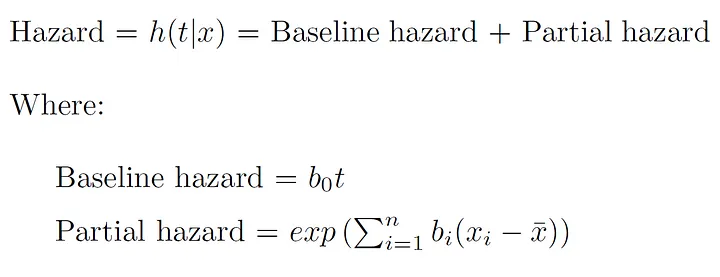

In the above equation, the first term is the baseline hazard and the second term known as partial hazard. The partial hazard inflates or deflates the baseline hazard based on covariates.

Cox-PH Model Assumptions

Cox proportional hazards regression model assumptions includes:

Independence of survival times between distinct individuals in the sample<br>
Linearity in Log Hazards: The relationship between the log of the hazard and the covariates is assumed to be linear.  <br>
A constant hazard ratio over time<br>
Non-Collinearity<br>
<br>
Definition of Hazard and Hazard Ratio

Hazard is defined as the slope of the survival curve. It is a measure of how rapidly subjects are dying.
The hazard ratio compares two groups. If the hazard ratio is 2.0, then the rate of deaths in one group is twice the rate in the other group.

<u> The Cox model </u> estimates the hazard or risk of an event based on the relationships between the covariates and the hazard function, using partial likelihood estimation. 
It assumes that the hazard ratios between any two groups remain constant over time (proportional hazards assumption) but does not assume a particular parametric form for the baseline hazard.

In [ ]:
# Define features to include in the model
data = data[[ 'time', 'age', 'sex', 'ph.ecog','ph.karno', 'pat.karno', 'meal.cal', 'wt.loss', 'dead']]
# Drop Nan values
data= data.dropna(subset=['time', 'age', 'sex', 'ph.ecog','ph.karno', 'pat.karno', 'meal.cal', 'wt.loss', 'dead'])



In [ ]:
dummies_sex = pd.get_dummies(data["sex"], prefix = 'sex')
dummies_sex.head(4)

In [ ]:
dummies_sex = dummies_sex[["sex_1"]]
data = pd.concat([data, dummies_sex], axis = 1)
data = data.drop("sex", axis = 1)
data.head()

In [ ]:
from lifelines import CoxPHFitter
import warnings
warnings.filterwarnings("ignore")


cph = CoxPHFitter()
cph.fit(data,"time",event_col="dead")
cph.print_summary()

Exp(coef) lower 95% = 1: The lower bound of the 95% confidence interval for the hazard ratio is 1. This suggests that, according to the data and the analysis, the hazard ratio could be as low as 1 but is not significantly different from 1. A hazard ratio of 1 implies no difference in the risk or hazard between compared groups or levels of a covariate.

Exp(coef) upper 95% = 1: The upper bound of the 95% confidence interval for the hazard ratio is also 1. This indicates that the hazard ratio could be as high as 1 but is not significantly different from 1. A hazard ratio of 1 means there is no change in the hazard or risk between the groups or levels being compared.

In the context of a Cox Proportional Hazards Model, significant coefficients for variables indicate the impact of these variables on the hazard or risk of an event occurring. Significant coefficients are associated with statistically meaningful predictors that influence the event of interest (death, relapse, failure, etc.) in survival analysis.

<u> Interpret the coefficient</u><br>
The risk of death increases by 1% for each increased year of age

A hazard ratio of 1.73 suggests that, all else being equal, the hazard of experiencing the death for males is approximately 1.73 times the hazard for the females after accounting for other factors in the model. Or, males have a risk of death 73% higher than females, cotrolling for other covariates

#### check_assumptions

In [ ]:
from lifelines.statistics import proportional_hazard_test
results = proportional_hazard_test(cph, data, time_transform='rank')
results.print_summary(decimals=3, model="untransformed variables")